## Radiative transfer

Radiation modelling, is a notorious challenging due to its highly coupled nature. It is important that the goals of our model are defined, such that when approximations are made to simply the problem, the sources of discrepancy can be understood. Throughout the book most of the effort in the chapters has been focused around $\textrm{CO}_2$. Therefore, to continue this focus, the radiation model that is developed is focused on modelling the greenhouse effect caused by molecules re-radiating longwave radiation into the atmosphere. We take the only source of radiation to be black body radiation emitted by the earth, assuming it is a perfect black body, at some temperature $T$ and wavenumber $\nu$ the spectral radiance is
```{math}
:label:
B(T, \nu) = 2hc^2 \nu^3 \frac{1}{e^{hc\nu/(k_bT)} - 1}.

```

```{note}
The hitran convention for wavenumber is used where it is denoted as $\nu$ rather than $\tilde{\nu}$ in many texts.
```
Additionally, because the effects of incoming solar radiation are not considered, which performs a substantial amount of heating in the stratosphere with absorption of UV by $\textrm{O_3}$, limiting the model to only extend up to 10km enables the model to both avoid warming due to shortwave and relative gas concentration changes as discussed in [Standard Atmosphere Model](./lorentzian_broadening.ipynb).

To start the simplest model of the atmosphere is that it is a single block of some height, from which an observer is looking down perpendicular to and radiation is emitted parallel to the surface. The Beer-Lambert Law describes this
```{math}
:label:
-\frac{d}{d OD_\nu} I(OD_\nu, \hat{n}, \nu) = I(OD_\nu, \hat{n}, \nu).
```
The parameter $OD$ is the optical depth of the medium. This equation, describes a radiation model that only models the amount of light, which is not scattered by the medium. This is solved by a simple exponential decay, which has decay length inversely proportional to the optical depth of the medium.
```{math}
:label:
I = I_0 \exp (-OD)
```
This is an insufficient model for our use case; firstly, a key behaviour of greenhouse gases is that they re-radiate isotropically, and secondly, they have differing optical depth depending on [wavenumber](./lorentzian_broadening.ipynb).

To include the isotropic re-radiation we iterate upon the Beer-Lambert law, with the Schwarzschild equation. The Schwarzschild equation adds a black body radiation term to the Beer-Lambert law, which is dependent on the optical depth of the medium. Further, it is assumed that the incident radiation is incident on the medium with a direction defined by a unit vector $\hat{n}$
```{math}
:label:
\frac{d}{d \tau_nu} I(OD_{\nu}, \hat{n}, \nu)= -\frac{1}{\cos\theta} [I(OD_{\nu}, \hat{n}, \nu) - B(T(OD_{\nu}), \nu)].
```
Where $OD = k(\nu, p, T)u$, $u$ is the column number density of absorbing species and $k(\nu, p, T)$ is the absorption coefficient per molecule per unit length. The re-radiation term is the plank function $B(T(OD_\nu), \nu)$. Additionally, the $\cos \theta$ term comes from the distance through the medium of optical depth $\delta OD$, where , if the path of incoming radiation is at some angle $\theta$ to the perpendicular from the surface, the distance the radiation travels is further $\delta OD / \cos \theta$, as seen in the figure below from{cite}`pierrehumbert_2010`. This model is taken from sections of chapter 4 in $principles of planetary climate${cite}`pierrehumbert_2012`.
```{image} ../Figures/Schwarzchild.png
---
align: center
---
```
If it is assumed that the radiation incoming and outgoing is isotropic as is emitted black body radiation, then the directional dependence of the equation is removed. The Solution can then be integrated over a hemisphere,and two separate ordinary differential equations for upward and downward propagating spectral radiance can be performed, assuming that $\cos \bar{\theta} = 1/2$
\begin{align}
\int_0^{\pi/2}I(T(OD_{\nu}),\nu) d\Omega &= \int_0^{\pi/2} -\frac{1}{\cos\theta} [I(OD_{\nu}, \hat{n}, \nu) - B(T(OD_{\nu}), \nu)] d\Omega, \\
\frac{d}{d OD_{\nu}} I_+ &= - I_+ + \pi B(T_{\nu}, \nu).
\end{align} (up)
$I_+$ is all the radiation in the upward direction from the block of atmosphere. In the downward direction $I_-$, the equation is similar
\begin{align}
\int_{\pi/2}^{\pi}I(T(OD_{\nu}), \nu) d\Omega &= \int_{\pi/2}^{\pi} -\frac{1}{\cos\theta} [I(OD_{\nu}, \hat{n}, \nu) - B(T(OD_{\nu}), \nu)] d\Omega, \\
\frac{d}{d OD_{\nu}} I_- &=  I_- - \pi B(T_{\nu}, \nu).
\end{align} (down)
As the temperature of the radiation block is a function of the atmosphere's optical depth, Ideally it should be calculated, rather than taken from the ISA model. However, this is deceptively difficult. Often, atmospheres are not in just radiative equilibrium, because they are comprised of gases convection plays a key role in energy transfer as well, thus blocks of atmosphere may infect heat, and not be in thermal equilibrium with their surroundings. A model which includes, convection is much better approximated by an adiabatic atmosphere where warm blocks of air rise, expand and cool adiabatically. This, is typically the assumption for the lower atmosphere, [troposphere](https://ereader.cambridge.org/wr/viewer.html#book/95232efd-fe8e-4b72-ad9e-c3f22d2a0cda/ichap4/pos_1.4427424769341008){cite}`pierrehumbert_2010`. For higher altitudes, convection is less important and radiative equilibrium provides a better approximation.

Despite, it not being a good approximation, for the lower atmosphere, radiative equilibrium provides a more straightforward path to a solution. With this boundary condition two equations for the upwards and downward spectral radiance can be formed:
\begin{align}
0 = \frac{d}{d OD_{\nu}}I_+ - I_- &= -(I_+ + I_-) + 2 \pi B(T(OD_{\nu}, \nu), \\
 \frac{d}{d OD_{\nu}}I_+ + I_- &= -(I_+ - I_-).
\end{align} (label)
As an initial start point, a grey gas atmosphere is considered. This is where optical depth is independent of wavenumber.

## Grey Gas Model
With wavenumber independence, we can consider the total flux given by the integral over the integral over wavenumber and solid angle of the plank function which gives the Stephan-Boltzmann law
```{math}
:label:
\sigma T^4 = \int \int d \Omega d \nu B(T,\nu).
```
With the solution to eq.{eq}`label` now,
```{math}
:label:
I_+ - I_- = C,
```
Thus
```{math}
:label:
I_+ + I_- = -c OD + c'
```
Using the boundary condition that the outgoing longwave radiation(OLR) at the top of the atmosphere is a constant $I_{OLR}$
```{math}
:label: specific solution
I_+ + I_- = c' - c OD_{\infty} = I_{OLR},
```
Then
\begin{align}
c &= I_{OLR}, \\
c' &= I_{OLR}(OD_{\infty} + 1).
\end{align}
Finally, substituting into eq.{eq}`specific solution`
```{math}
:label:
T = \left(\frac{(1 + OD_{\infty} - OD)I_{\infty}}{2 \sigma} \right)^{1/4}.
```
This gives us the expression for the Grey Gas at zero altitude. A comparison between this and the surface temperature of the planet is plotted below.


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from simpletrans import isa
import scipy.constants as cst
from dur_utils import colours

mpl.style.use("../CDS.mplstyle")

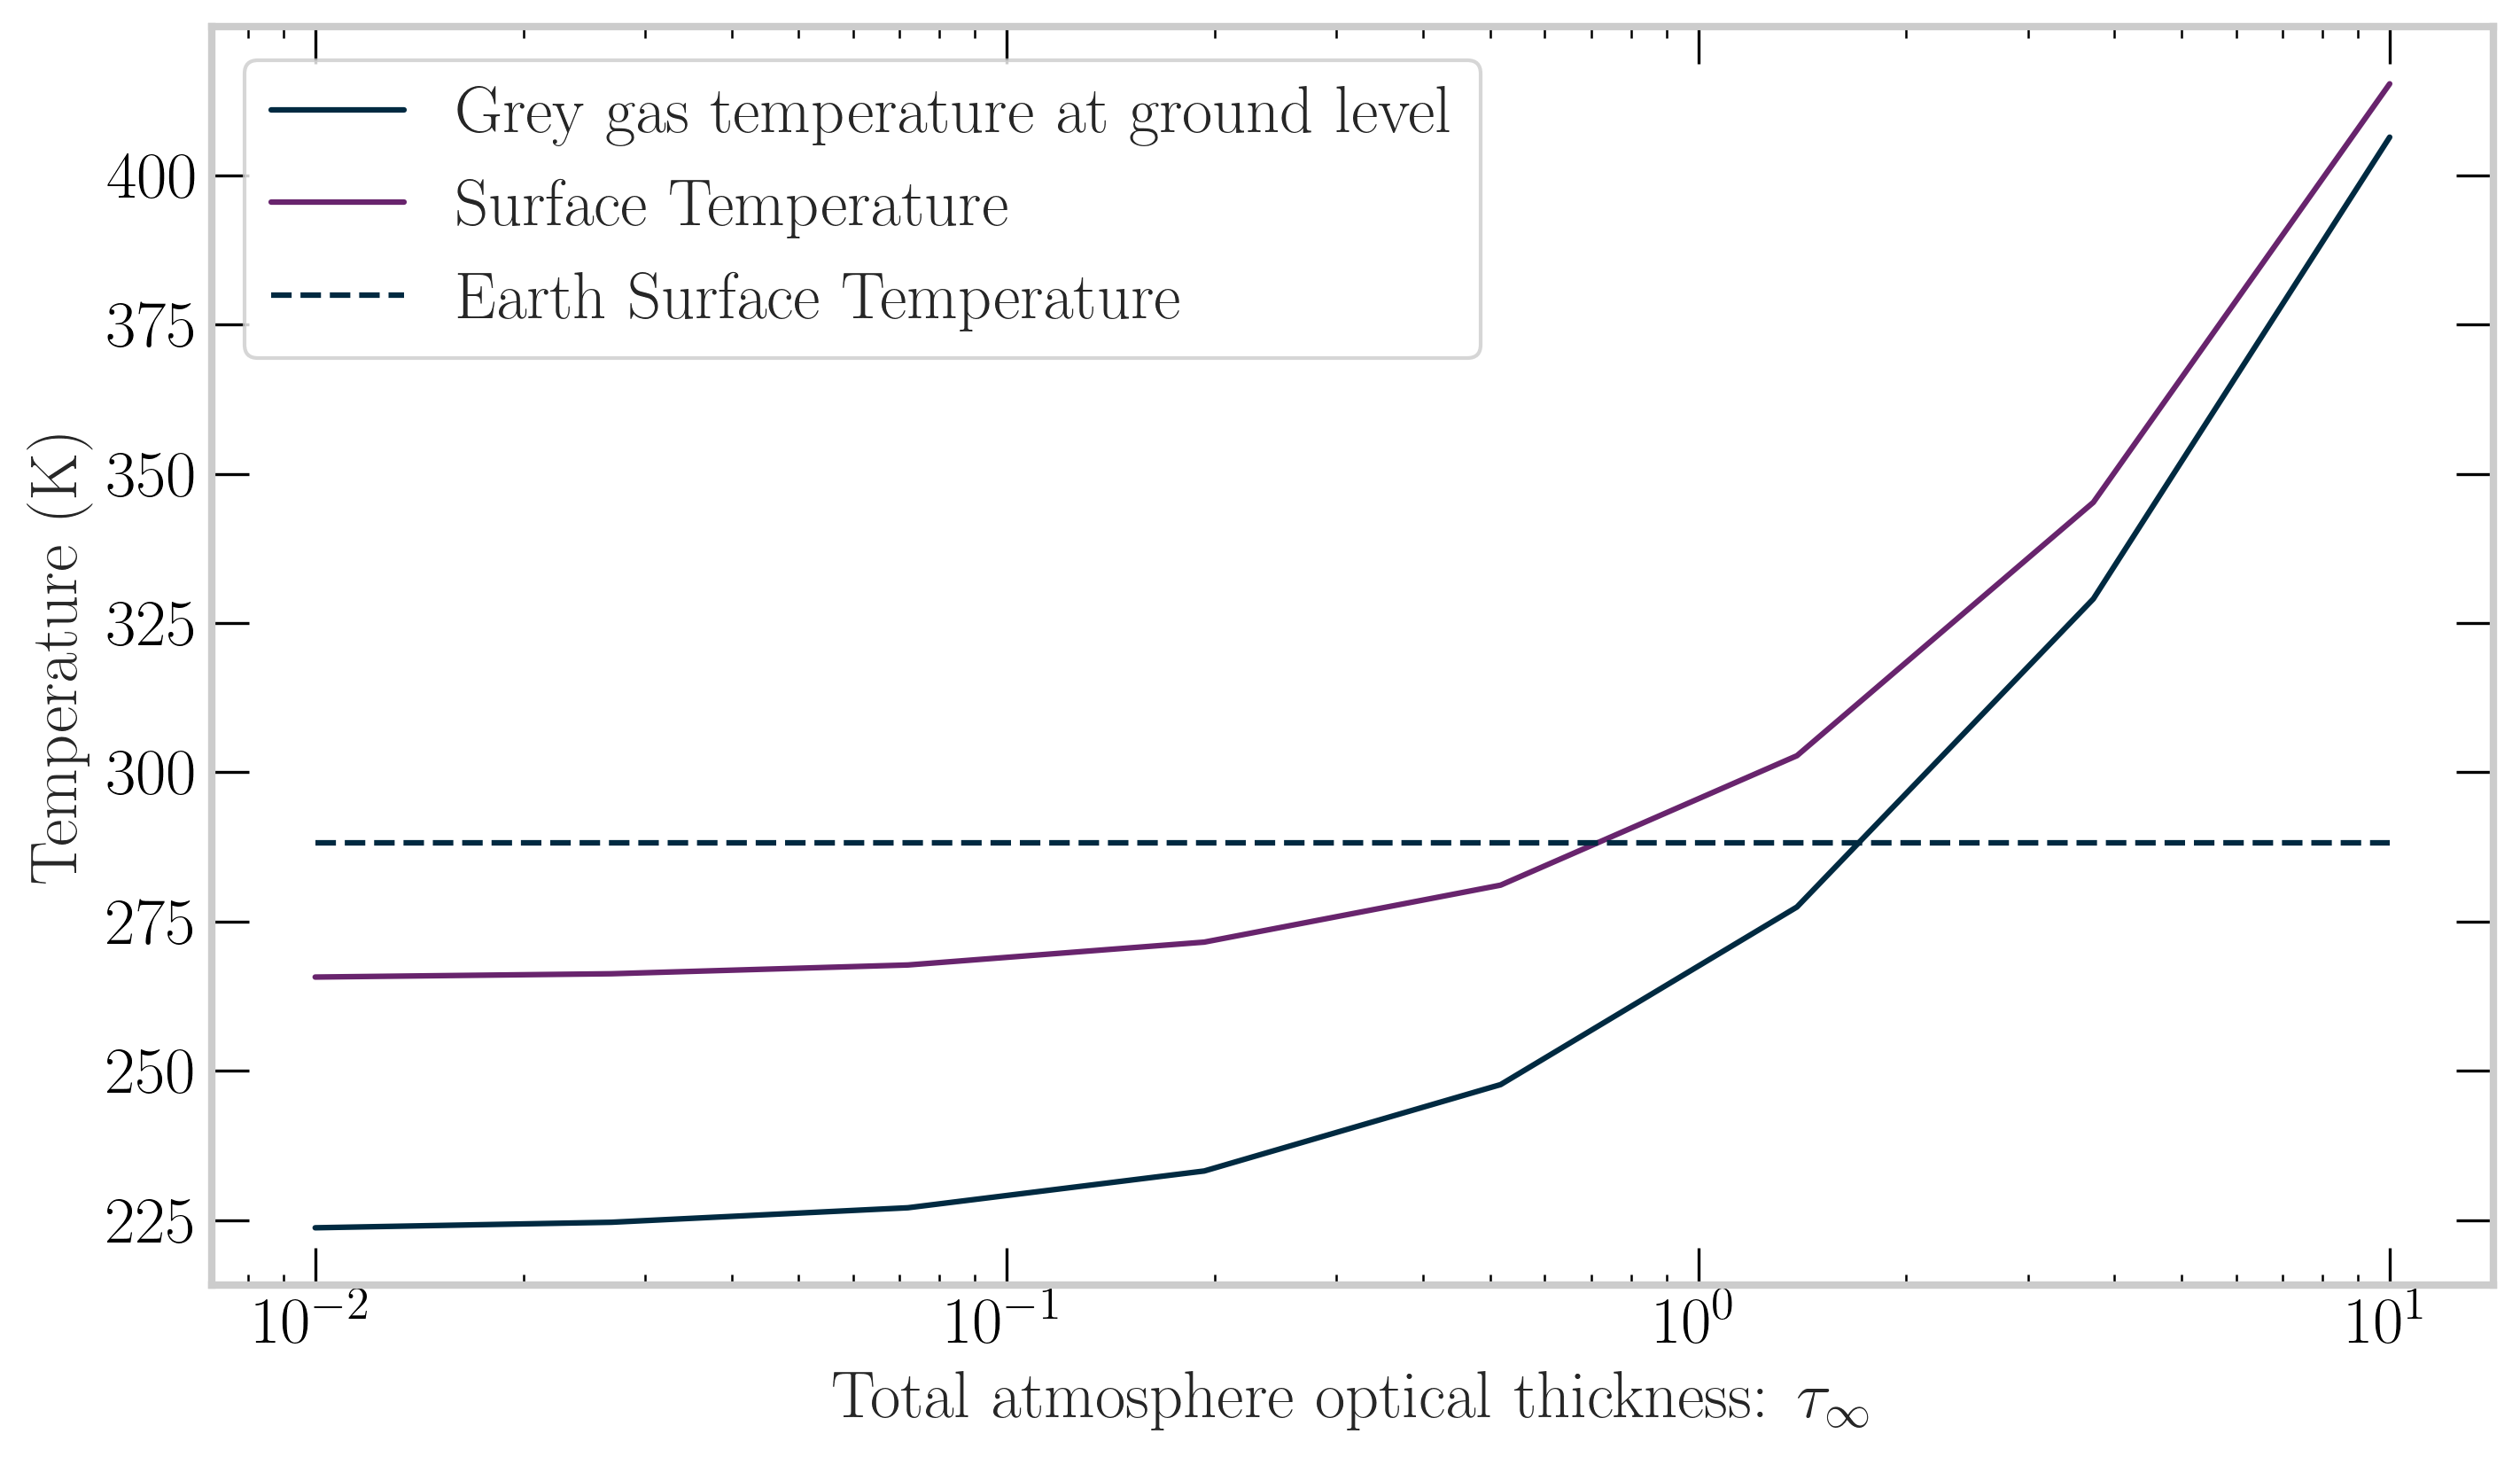

In [5]:

max_alt = 10000  # Alt strat stop
SBC = cst.physical_constants["Stefan-Boltzmann constant"][0]
olr = SBC * 2 * isa.get_temperature(max_alt) ** 4
points = 100
altitudes = np.linspace(0, max_alt, points, dtype=float)
taus_inf = np.logspace(-2, 1, 8)
isa_temp_profile = isa.get_temperature(altitudes)


def ground_gas_temp(od_inf: float) -> float:
    """
    Returns the ground temperature for a particular optical thickness of the
    whole atmosphere tau_infinity.
    Args:
        od_inf: The total optical Thickness of the atmosphere.

    Returns:
        t_ground

    """
    t_ground = ((1 + od_inf) * olr / (2 * SBC)) ** 0.25
    return t_ground


def ground_temp(od_inf: float) -> float:
    """
    Returns The surface temperature of the planet assuming radiative equilibruim as a function of
    Args:
        od_inf:

    Returns:

    """
    t_ground = ((2 + od_inf) * olr / (2 * SBC)) ** 0.25
    return t_ground

plt.figure(figsize=(10,6))
plt.semilogx(
    taus_inf,
    ground_gas_temp(taus_inf),
    c=colours.durham.ink,
    label="Grey gas temperature at ground level",
)
plt.semilogx(
    taus_inf,
    ground_temp(taus_inf),
    c=colours.durham.purple,
    label="Surface Temperature",
)
plt.semilogx(
    taus_inf,
    [isa.get_temperature(0) for i in taus_inf],
    linestyle="--",
    c=colours.durham.ink,
    label="Earth Surface Temperature",
)
plt.legend()
plt.xlabel(r"Total atmosphere optical thickness: $OD_{\infty}$")
plt.ylabel("Temperature (K)");


As the optical thickness of the atmosphere increases the surface temperature and the Grey Gas surface temperature approach each other, reducing the need for convection.
```{math}
:label:
T(0) = \left[\frac{(1 + \tau_{\infty})I_{OLR}}{2 \sigma} \right]^{1/4}
```
This does highlight a problem at low altitudes, where the total optical thickness is low. There is a large differential between the surface temperature and the atmosphere temperature. This is clearly a poor model for Earth, as the ground is in equilibrium with the air at surface level. Clearly, this radiative equilibrium assumption is not close enough to be valid throughout the whole atmosphere for our purposes.

An assumptions change is required. In the next page we assume being in a radiation and convection based equilibrium. This removes the boundary condition that each layer must have the same amount of flux in as it lets out. When convection is included, it is assumed that hot pockets of gas rise and adiabatically expand lowering their temperature, to maintain thermal equilibrium with their surroundings. This enables the model block atmosphere to transfer energy between atmosphere altitudes. For the models, these convection currents are not included, and so energy equilibrium consevation is assumend but flux conservation is not required.